In [165]:
% matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import os

In [90]:
working_dir = os.path.join(os.getcwd())

In [111]:
# Load the data
data_dir = os.path.join( working_dir, "datasets", "lifesat" )
oecd_bil_path = os.path.join( data_dir, "oecd_bli_2015.csv" )
gdp_per_capita_path = os.path.join( data_dir, "gdp_per_capita.csv")

oecd_bli = pd.read_csv( oecd_bil_path, thousands = ',' )

gdp_per_capita = pd.read_csv( gdp_per_capita_path, thousands = ',', delimiter = '\t',
                            encoding = 'latin1', na_values = "n/a")

In [225]:
# Prepare the data

bli = oecd_bli[( oecd_bli.Indicator == 'Life satisfaction')][['Country', 'Value']]
bli.columns = ['Country', 'Life satisfaction']
bli.set_index('Country')

gdp = gdp_per_capita[['Country', '2015']]
gdp.columns = ['Country', 'GDP per capita']
gdp.set_index('Country')

country_stats = bli.merge( gdp, on = 'Country', how = 'inner' )

In [226]:
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

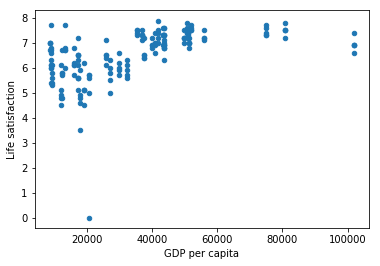

In [227]:
# Visualize the data
country_stats.plot( kind = 'scatter', x = "GDP per capita", y = "Life satisfaction")
plt.show()

In [228]:
# Select a linear model
model = LinearRegression().fit(X, y)

In [231]:
# Make a prediction for Cyprus
X_new = [[22587]] # Cyprus' GDP per capita

print(model.predict(X_new))

[[ 6.24439261]]
